In [2]:
import gymnasium as gym
import random
import numpy as np
import matplotlib.pyplot as plt
import time

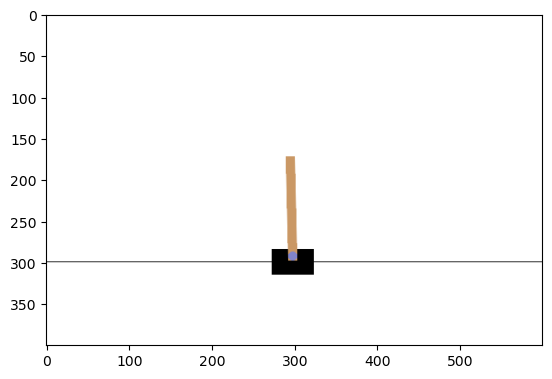

In [3]:
# render_mode="human"
environment = gym.make("CartPole-v1",render_mode="rgb_array")
environment.reset() 
tablero = environment.render()
plt.imshow(tablero)

Reward = 1.0 terminated = False truncated = False new_state = [-0.01370318  0.17772898 -0.02473394 -0.27827734]


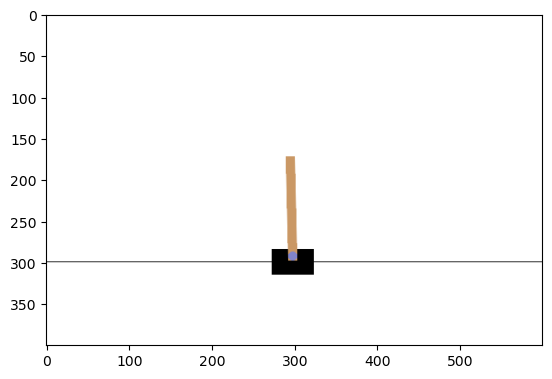

In [4]:
action = environment.action_space.sample()
new_state, reward, terminated, truncated, info = environment.step(action)
tablero = environment.render()
print(f'Reward = {reward} terminated = {terminated} truncated = {truncated} new_state = {new_state}')
plt.imshow(tablero)

In [ ]:
# simulate the environment
import time


episodeNumber=5
timeSteps=20
 
environment = gym.make("CartPole-v1",render_mode="human")
 
for episodeIndex in range(episodeNumber):
    initial_state=environment.reset()
    print(episodeIndex)
    environment.render()
    appendedObservations=[]
    for timeIndex in range(timeSteps):
        print(timeIndex)
        random_action=environment.action_space.sample()
        observation, reward, terminated, truncated, info =environment.step(random_action)
        appendedObservations.append(observation)
        time.sleep(0.1)
        if (terminated):
            time.sleep(1)
            break
environment.close() 

In [24]:
def get_dimension(x,y,size):
    subinterval_limits = np.linspace(x, y, size + 1)
    n=[]
    for ind,x in enumerate(subinterval_limits):
        if ind!=0:
            n.append(x)
        n.append(x)
    if len(n)%2!=0:
        n.pop(-1)
    val=np.split(n,np.arange(2,len(n),2))
    return subinterval_limits,val,len(val)

def traduce_valor(v, bins):
    for index,i in enumerate(bins):
        if i[0]<v and i[1]>v:
            return index
    if v<bins[0][0]:
        return 0
    else:
        return len(bins)-1

In [15]:
npos = 6
nvel = 10
nangl = 20
nang_vel = 10

pos=get_dimension(-2.4,2.4,6)
vel=get_dimension(-4,4,10)
angl=get_dimension(-.2095,.2095,20)
ang_vel=get_dimension(-4,4,10)

In [10]:
pos

(array([-2.4, -1.6, -0.8,  0. ,  0.8,  1.6,  2.4]),
 [array([-2.4, -1.6]),
  array([-1.6, -0.8]),
  array([-0.8,  0. ]),
  array([0. , 0.8]),
  array([0.8, 1.6]),
  array([1.6, 2.4])],
 6)

In [8]:
env=gym.make('CartPole-v1')

Q-table before training:
[[[[[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   ...

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]]


  [[[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   ...

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    ...
    [0. 0.]

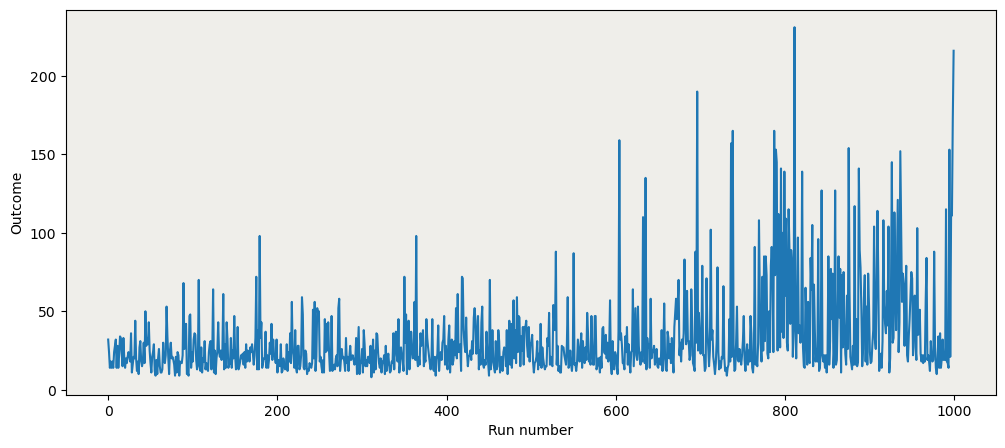

In [50]:
# CON MEJORA CONTINUA
qtable = np.zeros((npos,nvel,nangl,nang_vel,2))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.4            # Learning rate
gamma = 0.8            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

environment = gym.make("CartPole-v1",render_mode="rgb_array")

outcomes = []

print('Q-table before training:')
print(qtable)
results=[]
# Training
for x in range(episodes):
    state = environment.reset()[0]
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    results.append(0)
    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()
        s = traduce_valor(state[0],pos[1]),traduce_valor(state[1],vel[1]),traduce_valor(state[2],angl[1]),traduce_valor(state[3],ang_vel[1])
        
        # Comprobamos que tipo de acción usamos
        if rnd < epsilon:
          action = environment.action_space.sample()
        else:
          action = np.argmax(qtable[s]) 
        
        # Calculamos en el array de 5D la posición con la acción
        sA = traduce_valor(state[0],pos[1]),traduce_valor(state[1],vel[1]),traduce_valor(state[2],angl[1]),traduce_valor(state[3],ang_vel[1]),action
        new_state, reward, terminated, truncated, info = environment.step(action)
        done = terminated or truncated
        # Update Q(s,a)
        qtable[sA] = qtable[sA] + \
                                alpha * (reward + gamma * np.max(qtable[traduce_valor(new_state[0],pos[1]),
                                                                        traduce_valor(new_state[1],vel[1]),
                                                                        traduce_valor(new_state[2],angl[1]),
                                                                        traduce_valor(new_state[3],ang_vel[1])]) - qtable[sA])

        # Decimos que el estado es el nuevo
        state = new_state

        # Si llegara a completarlo ponemos Succes
        if reward:
          outcomes[-1] = "Success"

        # Sumamos uno por vuelta que sobrevivió
        results[x] += 1

    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

plt.figure(figsize=(12, 5))
plt.xlabel("Vuelta")
plt.ylabel("R.Aguantados")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.plot(results)
plt.show()